In [52]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../cleaned-data/cleaned/contracts.csv', encoding='iso-8859-1', sep='\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22689037 entries, 0 to 22689036
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   COCO    object
 1   COMAX   object
 2   COPRO   int64 
dtypes: int64(1), object(2)
memory usage: 519.3+ MB


In [4]:
df = df.groupby('COMAX')['COPRO'].value_counts()

In [5]:
df = pd.DataFrame(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5432606 entries, ('00000226d8', 812) to ('ffffd39fd9', 4545)
Data columns (total 1 columns):
 #   Column  Dtype
---  ------  -----
 0   COPRO   int64
dtypes: int64(1)
memory usage: 77.4+ MB


In [11]:
df.index

MultiIndex([('00000226d8',  812),
            ('00000226d8',    1),
            ('00000226d8',  727),
            ('00000226d8',  921),
            ('00000226d8',  954),
            ('00000226d8', 4545),
            ('00005d4463',    3),
            ('00005d4463',   53),
            ('00005d4463',  137),
            ('00005d4463',  812),
            ...
            ('ffffd39fd9',  812),
            ('ffffd39fd9',    3),
            ('ffffd39fd9',   53),
            ('ffffd39fd9',  100),
            ('ffffd39fd9',  160),
            ('ffffd39fd9',  753),
            ('ffffd39fd9',  780),
            ('ffffd39fd9',  954),
            ('ffffd39fd9', 2233),
            ('ffffd39fd9', 4545)],
           names=['COMAX', 'COPRO'], length=5432606)

In [7]:
df.values

array([[12],
       [ 1],
       [ 1],
       ...,
       [ 1],
       [ 1],
       [ 1]])

## Lokking to transpose the data to calculate the PCA values, but couldn't do it in direct way, therefore I had to do all the following JOB

In [8]:
# seperate the data
COMAX, COPRO = [i[0] for i in df.index], [i[1] for i in df.index]
COUNTS = [i[0] for i in df.values]

# get the list of the products
PRODUCTS = set(COPRO)

In [9]:
group = list(zip(COMAX, COPRO, COUNTS))

In [10]:
group

[('00000226d8', 812, 12),
 ('00000226d8', 1, 1),
 ('00000226d8', 727, 1),
 ('00000226d8', 921, 1),
 ('00000226d8', 954, 1),
 ('00000226d8', 4545, 1),
 ('00005d4463', 3, 1),
 ('00005d4463', 53, 1),
 ('00005d4463', 137, 1),
 ('00005d4463', 812, 1),
 ('000093046d', 160, 1),
 ('000093046d', 381, 1),
 ('000093046d', 384, 1),
 ('0000b441aa', 2076, 20),
 ('0000b441aa', 812, 4),
 ('0000b441aa', 867, 2),
 ('0000b441aa', 53, 1),
 ('0000b441aa', 100, 1),
 ('0000b441aa', 137, 1),
 ('0000b441aa', 160, 1),
 ('0000b441aa', 167, 1),
 ('0000b441aa', 190, 1),
 ('0000b441aa', 530, 1),
 ('0000b441aa', 753, 1),
 ('0000b441aa', 771, 1),
 ('0000b441aa', 954, 1),
 ('0000b441aa', 2011, 1),
 ('0000b441aa', 2015, 1),
 ('0000b441aa', 2796, 1),
 ('0000b441aa', 4227, 1),
 ('0000b441aa', 7544, 1),
 ('0000bf69ff', 19, 1),
 ('0000cf2c88', 2076, 19),
 ('0000cf2c88', 812, 13),
 ('0000cf2c88', 53, 2),
 ('0000cf2c88', 647, 2),
 ('0000cf2c88', 523, 1),
 ('0000cf2c88', 753, 1),
 ('0000cf2c88', 780, 1),
 ('0000cf2c88', 7544,

In [11]:
# Make it a data row look a like
def clit(group):
    lol = len(group)
    count = 1
    out = dict()
    
    curr = group[0][0]
    out[curr] = [list(group[0][1:])]
    
    while count < lol:
        if group[count][0] == curr:
            out[curr].append(list(group[count][1:]))
        else:
            curr = group[count][0]
            out[curr] = [list(group[count][1:])]
            
        count += 1
    
    return out

In [12]:
out = clit(group)
out['00000226d8']

[[812, 12], [1, 1], [727, 1], [921, 1], [954, 1], [4545, 1]]

In [14]:
# compelete the data about the missing products, aka their value is equal to 0
def complete(out, PRODUCTS):
    for key in out.keys():
        local = [i[0] for i in out[key]]
        nice = [i for i in PRODUCTS if i not in local]

        for i in nice:
            out[key].append([i, 0])

    return out

In [15]:
# The work is done
out = complete(out, PRODUCTS)
out['00000226d8']

[[812, 12],
 [1, 1],
 [727, 1],
 [921, 1],
 [954, 1],
 [4545, 1],
 [2048, 0],
 [2, 0],
 [3, 0],
 [2051, 0],
 [5, 0],
 [2053, 0],
 [2052, 0],
 [8, 0],
 [9, 0],
 [10, 0],
 [2059, 0],
 [2057, 0],
 [2061, 0],
 [14, 0],
 [2063, 0],
 [2064, 0],
 [2065, 0],
 [16, 0],
 [19, 0],
 [20, 0],
 [8213, 0],
 [22, 0],
 [23, 0],
 [2072, 0],
 [24, 0],
 [26, 0],
 [2070, 0],
 [2076, 0],
 [21, 0],
 [2078, 0],
 [2079, 0],
 [2077, 0],
 [2081, 0],
 [2073, 0],
 [2083, 0],
 [2084, 0],
 [2085, 0],
 [32, 0],
 [8231, 0],
 [8232, 0],
 [2080, 0],
 [2090, 0],
 [43, 0],
 [44, 0],
 [2092, 0],
 [46, 0],
 [47, 0],
 [2096, 0],
 [49, 0],
 [50, 0],
 [51, 0],
 [52, 0],
 [53, 0],
 [54, 0],
 [2095, 0],
 [8239, 0],
 [2097, 0],
 [8244, 0],
 [62, 0],
 [65, 0],
 [2114, 0],
 [2115, 0],
 [2116, 0],
 [66, 0],
 [13, 0],
 [71, 0],
 [72, 0],
 [73, 0],
 [74, 0],
 [75, 0],
 [76, 0],
 [77, 0],
 [69, 0],
 [817, 0],
 [82000, 0],
 [81, 0],
 [80, 0],
 [83, 0],
 [84, 0],
 [85, 0],
 [86, 0],
 [17, 0],
 [8283, 0],
 [2140, 0],
 [2141, 0],
 [2054, 0

In [17]:
# to insure we've the same products order, we'll sort the lists
def sort_out(out):
    for key in out.keys():
        out[key].sort(key=lambda x: x[0])

    return out

In [18]:
# Done
out = sort_out(out)
out['00000226d8']

[[1, 1],
 [2, 0],
 [3, 0],
 [5, 0],
 [8, 0],
 [9, 0],
 [10, 0],
 [13, 0],
 [14, 0],
 [16, 0],
 [17, 0],
 [19, 0],
 [20, 0],
 [21, 0],
 [22, 0],
 [23, 0],
 [24, 0],
 [26, 0],
 [32, 0],
 [43, 0],
 [44, 0],
 [46, 0],
 [47, 0],
 [49, 0],
 [50, 0],
 [51, 0],
 [52, 0],
 [53, 0],
 [54, 0],
 [62, 0],
 [65, 0],
 [66, 0],
 [69, 0],
 [71, 0],
 [72, 0],
 [73, 0],
 [74, 0],
 [75, 0],
 [76, 0],
 [77, 0],
 [80, 0],
 [81, 0],
 [83, 0],
 [84, 0],
 [85, 0],
 [86, 0],
 [97, 0],
 [100, 0],
 [101, 0],
 [102, 0],
 [107, 0],
 [109, 0],
 [118, 0],
 [130, 0],
 [135, 0],
 [136, 0],
 [137, 0],
 [139, 0],
 [140, 0],
 [141, 0],
 [142, 0],
 [143, 0],
 [144, 0],
 [145, 0],
 [146, 0],
 [148, 0],
 [157, 0],
 [158, 0],
 [159, 0],
 [160, 0],
 [161, 0],
 [162, 0],
 [163, 0],
 [164, 0],
 [165, 0],
 [166, 0],
 [167, 0],
 [168, 0],
 [169, 0],
 [170, 0],
 [171, 0],
 [172, 0],
 [174, 0],
 [178, 0],
 [179, 0],
 [182, 0],
 [186, 0],
 [189, 0],
 [190, 0],
 [192, 0],
 [195, 0],
 [196, 0],
 [199, 0],
 [201, 0],
 [203, 0],
 [204, 0

In [20]:
# convert the products numbers to str
def prod_to_str(out):
    for key in out.keys():
        for new in out[key]:
            lol = str(new[0])
            new[0] = '0'*(5 - len(lol)) + lol
        
    return out

In [21]:
# Done
out = prod_to_str(out)
out['00000226d8']

[['00001', 1],
 ['00002', 0],
 ['00003', 0],
 ['00005', 0],
 ['00008', 0],
 ['00009', 0],
 ['00010', 0],
 ['00013', 0],
 ['00014', 0],
 ['00016', 0],
 ['00017', 0],
 ['00019', 0],
 ['00020', 0],
 ['00021', 0],
 ['00022', 0],
 ['00023', 0],
 ['00024', 0],
 ['00026', 0],
 ['00032', 0],
 ['00043', 0],
 ['00044', 0],
 ['00046', 0],
 ['00047', 0],
 ['00049', 0],
 ['00050', 0],
 ['00051', 0],
 ['00052', 0],
 ['00053', 0],
 ['00054', 0],
 ['00062', 0],
 ['00065', 0],
 ['00066', 0],
 ['00069', 0],
 ['00071', 0],
 ['00072', 0],
 ['00073', 0],
 ['00074', 0],
 ['00075', 0],
 ['00076', 0],
 ['00077', 0],
 ['00080', 0],
 ['00081', 0],
 ['00083', 0],
 ['00084', 0],
 ['00085', 0],
 ['00086', 0],
 ['00097', 0],
 ['00100', 0],
 ['00101', 0],
 ['00102', 0],
 ['00107', 0],
 ['00109', 0],
 ['00118', 0],
 ['00130', 0],
 ['00135', 0],
 ['00136', 0],
 ['00137', 0],
 ['00139', 0],
 ['00140', 0],
 ['00141', 0],
 ['00142', 0],
 ['00143', 0],
 ['00144', 0],
 ['00145', 0],
 ['00146', 0],
 ['00148', 0],
 ['00157',

## Now reassemnling the data but the products as colums as well

In [22]:
# Get the keys
COMAX_ = list(out.keys())
COMAX_[0], COMAX_[-1]

('00000226d8', 'ffffd39fd9')

In [23]:
# Products, already converted them to strings
PRODUCTS = [i[0] for i in out['00000226d8']]

In [24]:
data = dict()
data['COMAX'] = COMAX_
for i in PRODUCTS:
    data[i] = list()

In [25]:
data.keys()

dict_keys(['COMAX', '00001', '00002', '00003', '00005', '00008', '00009', '00010', '00013', '00014', '00016', '00017', '00019', '00020', '00021', '00022', '00023', '00024', '00026', '00032', '00043', '00044', '00046', '00047', '00049', '00050', '00051', '00052', '00053', '00054', '00062', '00065', '00066', '00069', '00071', '00072', '00073', '00074', '00075', '00076', '00077', '00080', '00081', '00083', '00084', '00085', '00086', '00097', '00100', '00101', '00102', '00107', '00109', '00118', '00130', '00135', '00136', '00137', '00139', '00140', '00141', '00142', '00143', '00144', '00145', '00146', '00148', '00157', '00158', '00159', '00160', '00161', '00162', '00163', '00164', '00165', '00166', '00167', '00168', '00169', '00170', '00171', '00172', '00174', '00178', '00179', '00182', '00186', '00189', '00190', '00192', '00195', '00196', '00199', '00201', '00203', '00204', '00211', '00212', '00214', '00216', '00217', '00222', '00231', '00233', '00234', '00250', '00252', '00253', '00255',

In [26]:
# reassamble all the products values
def done(data, out):
    for key in out.keys():
        for val in out[key]:
            data[val[0]].append(val[1])
        
    return data

In [27]:
data = done(data, out)

In [28]:
data = pd.DataFrame(data)

In [29]:
del out

In [30]:
data.head()

,COMAX,00001,00002,00003,00005,00008,00009,00010,00013,00014,...,74275,74276,74284,74285,74286,74291,82000,94600,94700,94800
0,00000226d8,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,00005d4463,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,000093046d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0000b441aa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0000bf69ff,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633422 entries, 0 to 633421
Columns: 1034 entries, COMAX to 94800
dtypes: int64(1033), object(1)
memory usage: 4.9+ GB


In [37]:
data.shape

(633422, 1034)

In [32]:
len(PRODUCTS)

1033

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [46]:
x = data.loc[:, PRODUCTS].values

In [47]:
x = StandardScaler().fit_transform(x)

In [51]:
pca = PCA().fit(x)

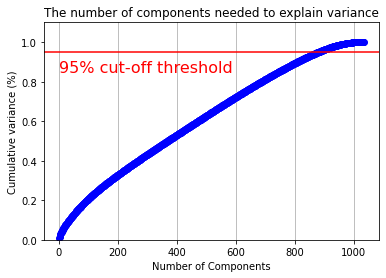

In [54]:
fig, ax = plt.subplots()
xi = np.arange(1, len(PRODUCTS) + 1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [48]:
pca = PCA(n_components = 0.95)

In [49]:
principalComponents = pca.fit_transform(x)

In [36]:
# since we have 10 products we already know that it will be 10 PCA
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PCA-{}'.format(i) for i in range(1, 11)])

In [38]:
principalDf

,PCA-1,PCA-2,PCA-3,PCA-4,PCA-5,PCA-6,PCA-7,PCA-8,PCA-9,PCA-10
0,-0.666116,-1.136881,0.978239,0.541362,-0.386773,-0.910148,-0.837552,0.389480,-0.573077,-0.307515
1,-1.288706,0.000403,-0.677441,-0.562691,-1.749194,1.020384,0.843781,0.036814,-0.536203,-0.141552
2,-1.690757,-0.114129,-0.182771,0.196209,0.992372,0.558184,0.222772,-0.508335,-0.060208,-0.093158
3,1.975899,0.927151,-1.653565,-1.814180,-0.289269,-0.582967,0.564126,-0.217679,0.295756,0.713485
4,0.255077,2.575486,-2.749994,0.749088,-0.918790,0.280073,-0.806445,1.329513,-0.814100,-0.385787
...,...,...,...,...,...,...,...,...,...,...
570175,-0.373618,-0.564755,0.611408,-1.057193,-0.159012,0.664664,0.415588,-0.953158,-0.819092,1.089652
570176,-0.080382,-0.577872,1.138760,-1.225243,-1.434718,-0.634704,-0.514810,-0.333064,-0.934739,2.170752
570177,-2.153333,0.145627,0.174661,0.354602,-0.101157,0.068238,0.159758,0.370038,0.171916,-0.082067
570178,-0.898056,-0.405393,0.073852,0.055392,0.782794,-0.228217,-0.490303,-0.760779,-0.392588,1.025425


In [39]:
#principalDf['COMAX'] = data['COMAX']
principalDf.insert(0, 'COMAX', data['COMAX'], True)

In [40]:
principalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570180 entries, 0 to 570179
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   COMAX   570180 non-null  object 
 1   PCA-1   570180 non-null  float64
 2   PCA-2   570180 non-null  float64
 3   PCA-3   570180 non-null  float64
 4   PCA-4   570180 non-null  float64
 5   PCA-5   570180 non-null  float64
 6   PCA-6   570180 non-null  float64
 7   PCA-7   570180 non-null  float64
 8   PCA-8   570180 non-null  float64
 9   PCA-9   570180 non-null  float64
 10  PCA-10  570180 non-null  float64
dtypes: float64(10), object(1)
memory usage: 47.9+ MB


In [41]:
principalDf.to_csv("../cleaned-data/production/PCA-data.csv", index=False, sep="\t")